<a href="https://colab.research.google.com/github/nikoshaa/group-6-machine-learning-2023/blob/main/SVM_RBF_Kernel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kasus - Klasifikasi Tulisan Tangan dengan Dataset MNIST

## Deskripsi Umum

Anda diminta untuk melakukan klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM untuk merekognisi tulisan tangan dari dataset MNIST

## Tentang Dataset MNIST

Dataset MNIST (Modified National Institute of Standards and Technology) merupakan dataset berupa citra grayscale dengan ukuran 28x28 yang berisi tulisan tangan dari digit angka 0-9. Jumlah data dalam dataset ini adalah 70.000 data.

## Detail Kuis

1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

3. Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk
    - Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
    - Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

4. Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.
   - Anda diperbolehkan untuk melakukan tunning parameter.
   - Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.

5. Evaluasi model yang Anda buat terhadap data training dan data testing.
   - Gunakan metric *accuracy* untuk mengetahui tingkat akurasi data training dan data testing.
   - Gunakan fungsi *classification_report* untuk mengetahui performa model secara holistik.
   - Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.

6. Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.

7. Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!

## Library

In [53]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

## Dataset MNIST

In [54]:
# Unduh Dataset MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
print(mnist.DESCR)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [55]:
# Menampilkan keys pada data
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

## Answers

1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

Data Count for Label 0: 6903
Data Count for Label 1: 7877
Data Count for Label 2: 6990
Data Count for Label 3: 7141
Data Count for Label 4: 6824
Data Count for Label 5: 6313
Data Count for Label 6: 6876
Data Count for Label 7: 7293
Data Count for Label 8: 6825
Data Count for Label 9: 6958


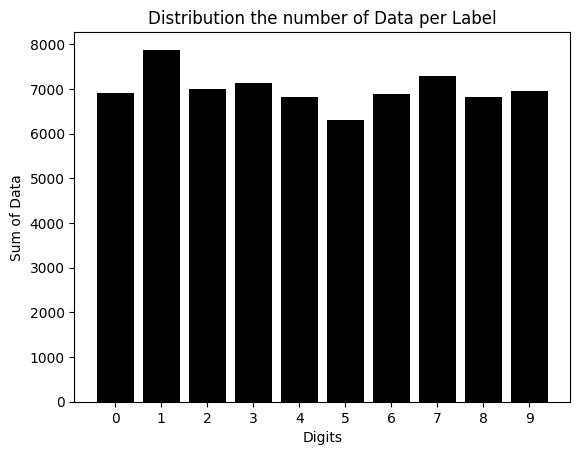

In [56]:
# Menghitung jumlah data untuk setiap label (0-9)
label_counts = np.bincount(mnist.target.astype(int))

# Menampilkan jumlah data untuk setiap label (0-9)
for i in range(10):
    print(f"Data Count for Label {i}: {label_counts[i]}")

# Visualisasi distribusi jumlah data per label
plt.bar(range(10), label_counts, tick_label=range(10), color='black')  # Menambahkan argumen color='black')
plt.xlabel('Digits')
plt.ylabel('Sum of Data')
plt.title('Distribution the number of Data per Label')
plt.show()

Berdasarakan hasil perhitungan dan visualisasi, dapat dilihat bahwa data label dari dataset MNIST terbilang seimbang. Hal ini dapat dilihat dari jumlah dari masing-masing data yang tidak ada perbedaan yang terlalu signifikan.

2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

In [57]:
# Mengambil data dan label
X, y = mnist.data, mnist.target

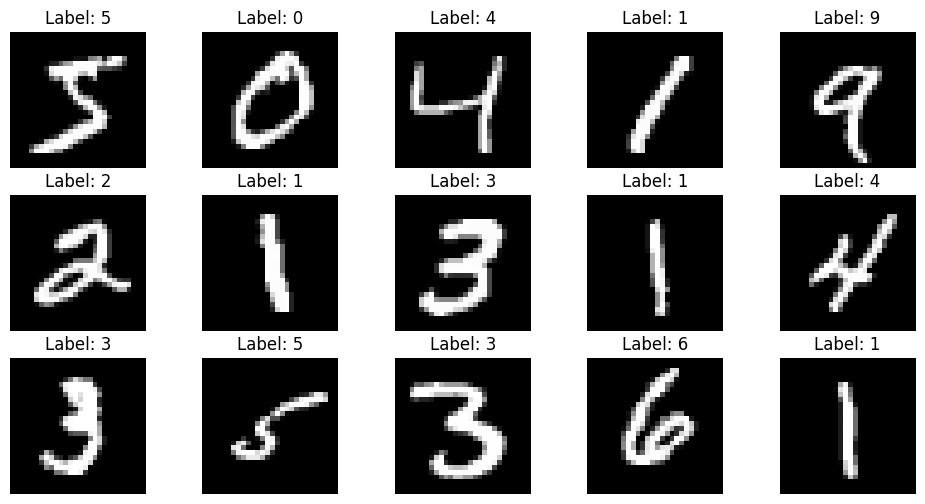

In [58]:
# Menampilkan 15 citra pertama berserta labelnya
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap="gray")
    plt.title(f"Label: {y[i]}")
    plt.axis("off")
plt.show()

3. Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk
    - Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
    - Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

In [59]:
# Mendefinisikan PCA untuk ekstraksi fitur
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)

In [60]:
# Skala Data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

5. Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.
   - Anda diperbolehkan untuk melakukan tunning parameter.
   - Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM

In [62]:
# Tunning Paramater
def train_model(model,param_grid,X,y):
  grid = GridSearchCV(model, param_grid,n_jobs=-1)
  %time grid.fit(X,y)
  print(grid.best_params_)
  print(grid.best_score_)

  model = grid.best_estimator_
  return model

In [63]:
# Membuat model SVM
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

5. Evaluasi model yang Anda buat terhadap data training dan data testing.
   - Gunakan metric *accuracy* untuk mengetahui tingkat akurasi data training dan data testing.
   - Gunakan fungsi *classification_report* untuk mengetahui performa model secara holistik.
   - Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.

In [64]:
# Evaluasi performa model
def evaluate_model(y_true, y_pred, label):
    acc = accuracy_score(y_true, y_pred)
    print(f"{label} Accuracy: {acc} = {acc * 100:.2f}%")
    print(f"{label} Classification Report:\n{classification_report(y_true, y_pred)}")
    print(f"{label} Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")

In [65]:
# Visualisasi hasil prediksi model
def show_prediction(X,y,pred):

  # Inisialisasi label yang benar (ground truth) dan label prediksi
  true_labels = y
  predicted_labels = pred

  # Menampilkan citra dari data testing dengan label benar dan label prediksi
  plt.figure(figsize=(12, 6))
  for i in range(30):
      plt.subplot(6, 5, i + 1)
      plt.imshow(X[i].reshape(28, 28), cmap="gray")

      # Tentukan warna teks berdasarkan benar atau salah
      if true_labels[i] == predicted_labels[i]:
          text_color = 'black'  # Jika prediksi benar, teks berwarna hitam
      else:
          text_color = 'red'  # Jika prediksi salah, teks berwarna merah

      plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}", color=text_color)
      plt.axis("off")
  plt.tight_layout()
  plt.show()

6. Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.!

Rasio 70:30

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [67]:
param_grid = {'svc__C': [5],
              'svc__gamma': [0.05],
              'pca__n_components': [50]}
trained_model = train_model(model,param_grid,X_train,y_train)
y_pred=trained_model.predict(X_test)
evaluate_model(y_test,y_pred,"SVM | scaled | PCA | 7:3")

CPU times: user 51.7 s, sys: 3.57 s, total: 55.2 s
Wall time: 4min 41s
{'pca__n_components': 50, 'svc__C': 5, 'svc__gamma': 0.05}
0.9850612244897959
SVM | scaled | PCA | 7:3 Accuracy: 0.9854285714285714 = 98.54%
SVM | scaled | PCA | 7:3 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2058
           1       0.99      0.99      0.99      2364
           2       0.98      0.99      0.98      2133
           3       0.99      0.98      0.98      2176
           4       0.98      0.98      0.98      1936
           5       0.99      0.98      0.99      1915
           6       0.99      0.99      0.99      2088
           7       0.98      0.99      0.98      2248
           8       0.99      0.98      0.98      1992
           9       0.98      0.97      0.98      2090

    accuracy                           0.99     21000
   macro avg       0.99      0.99      0.99     21000
weighted avg       0.99      0.99   

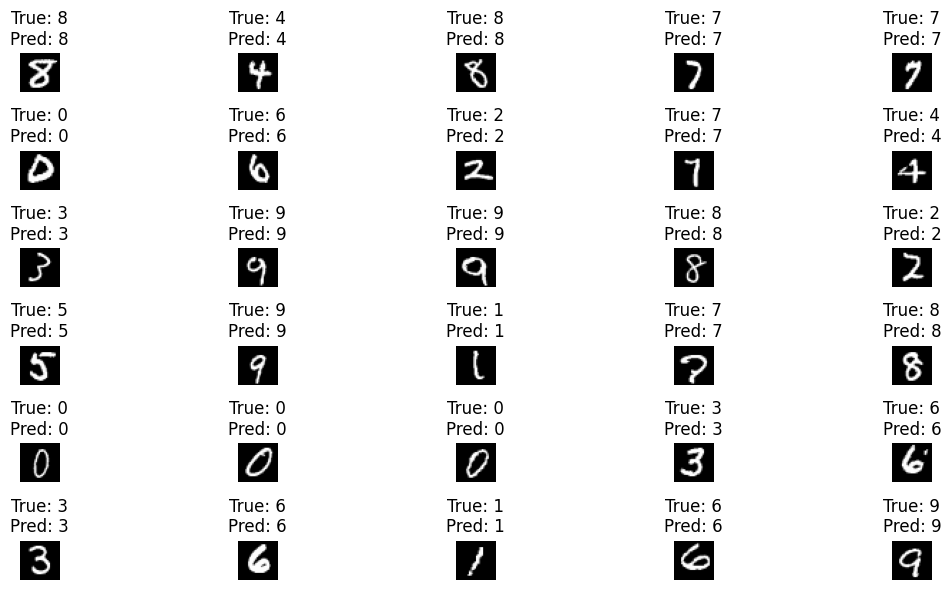

In [68]:
show_prediction(X_test,y_test,y_pred)

Rasio 80:20

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [70]:
param_grid = {'svc__C': [5],
              'svc__gamma': [0.05],
              'pca__n_components': [50]}
trained_model = train_model(model,param_grid,X_train,y_train)
y_pred=trained_model.predict(X_test)
evaluate_model(y_test,y_pred,"SVM | scaled | PCA | 8:2")

CPU times: user 1min 4s, sys: 2.99 s, total: 1min 7s
Wall time: 5min 46s
{'pca__n_components': 50, 'svc__C': 5, 'svc__gamma': 0.05}
0.9860714285714286
SVM | scaled | PCA | 8:2 Accuracy: 0.9857857142857143 = 98.58%
SVM | scaled | PCA | 8:2 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.99      0.99      0.99      1600
           2       0.98      0.99      0.98      1380
           3       0.98      0.98      0.98      1433
           4       0.98      0.99      0.98      1295
           5       0.99      0.98      0.99      1273
           6       0.99      0.99      0.99      1396
           7       0.98      0.99      0.99      1503
           8       0.98      0.98      0.98      1357
           9       0.98      0.97      0.98      1420

    accuracy                           0.99     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       0.99      0.99 

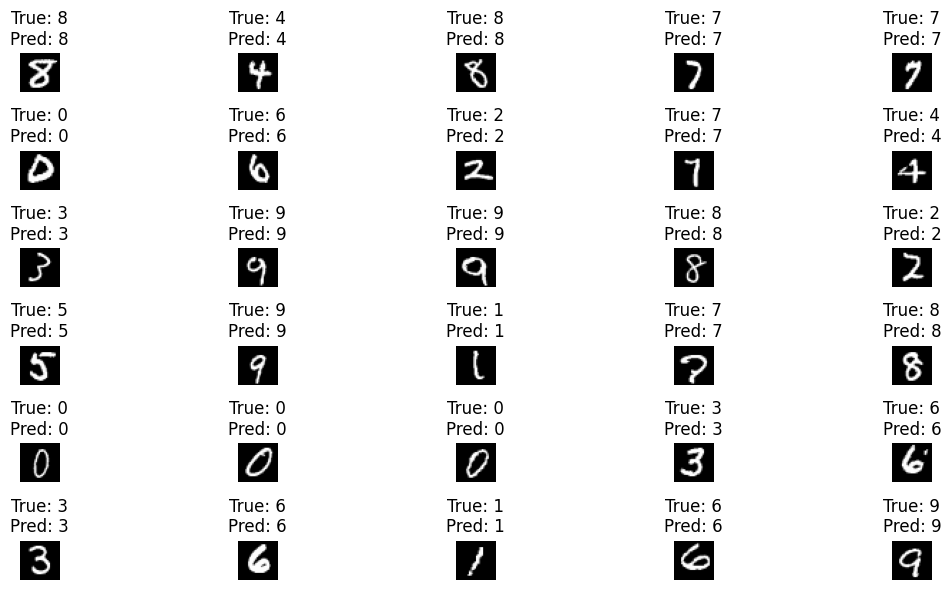

In [71]:
show_prediction(X_test,y_test,y_pred)

Rasio 90:10

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

In [76]:
param_grid = {'svc__C': [5],
              'svc__gamma': [0.05],
              'pca__n_components': [50]}
trained_model = train_model(model,param_grid,X_train,y_train)
y_pred=trained_model.predict(X_test)
evaluate_model(y_test,y_pred,"SVM | scaled | PCA | 9:1")

CPU times: user 1min 48s, sys: 3.86 s, total: 1min 52s
Wall time: 8min 4s
{'pca__n_components': 50, 'svc__C': 5, 'svc__gamma': 0.05}
0.9868095238095238
SVM | scaled | PCA | 9:1 Accuracy: 0.9864285714285714 = 98.64%
SVM | scaled | PCA | 9:1 Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       683
           1       0.99      0.99      0.99       800
           2       0.97      0.99      0.98       674
           3       0.98      0.98      0.98       760
           4       0.98      0.99      0.98       611
           5       0.99      0.99      0.99       658
           6       0.99      0.99      0.99       677
           7       0.99      0.99      0.99       724
           8       0.98      0.98      0.98       693
           9       0.98      0.97      0.98       720

    accuracy                           0.99      7000
   macro avg       0.99      0.99      0.99      7000
weighted avg       0.99      0.99

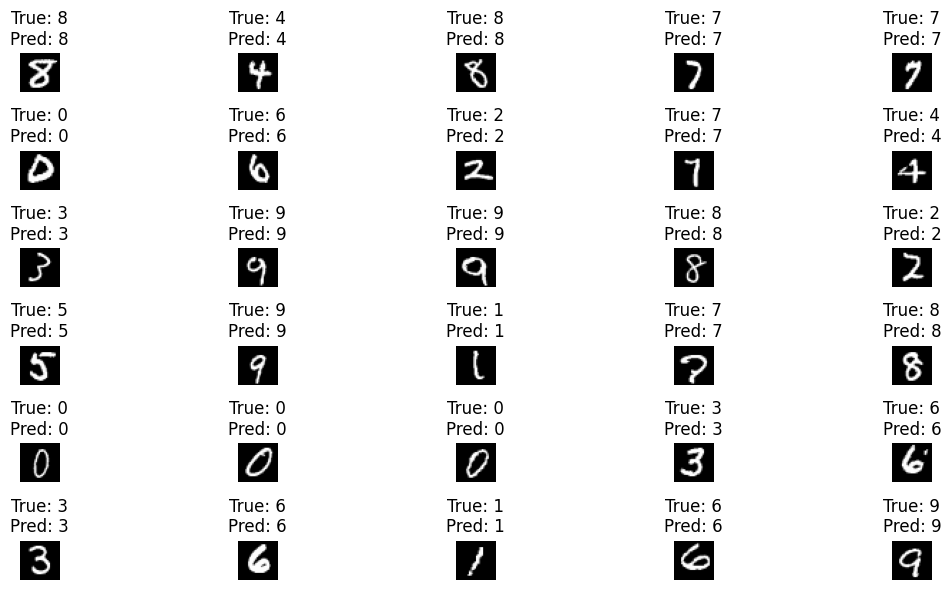

In [77]:
show_prediction(X_test,y_test,y_pred)

7. Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan

Konfigurasi Model:

  - Model yang di gunakan adalah SVM, data fitur di scalling dengan Min-Max Scalling, ekstraksi fitur menggunakan 50 komponen utama.

Parameter:

  - Parameter c untuk SVM diatur ke 5, parameter gamma diatur ke 0.05

Tingkat Akurasi:

  - Rasio 70:30

    - Akurasi 98.54%

  - Rasio 80:20

    - Akurasi 98.58%

  - Rasio 90:10

    - Akurasi 98.64%